##### Copyright 2022 The Emirhan BULUT.
# SO2 Emission Prediction from Diesel Engines with Quantum Technology (5G)
**Author:** [Emirhan BULUT](https://www.linkedin.com/in/artificialintelligencebulut/)<br>
**Date created:** 2022/11/12<br>
**Last modified:** 2022/11/12<br>
**Description:** A worldwide study has been conducted on the emission values of SO2 gases released from diesel engines in the world (class 1 if it has increased compared to the previous year, class 0 if there has been a decrease compared to the previous year, and class 0 for the starting years). In this research, 5G compatible quantum algorithms were designed by me. Quantum computer was used for the process. The minimum number of qubits is set for use on all computers. Finally, the same data was tested in the classical deep neural network (deep learning) network and Machine Learning algorithm (Random Forest). On the basis of test accuracy, the quantum5 algorithm was found to be more performant than all of them.

<table class="tfo-notebook-buttons" align="left">

  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1UAdJ-m9DFWlQWKnJNuyeRWmYexa1XjAJ?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/emirhanai"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Installing Libraries

In [ ]:
!pip install pip install tensorflow==2.7.0
!pip install pennylane

In [ ]:
!pip install pennylane-lightning[gpu]

In [ ]:
!pip install pennylane-lightning[qubits]

# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import layers

import numpy as np
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

import pennylane as qml
from pennylane import numpy as p_np

from pennylane.templates.state_preparations import MottonenStatePreparation
from pennylane.templates.layers import StronglyEntanglingLayers
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Data Prepare

In [ ]:
!git clone https://github.com/emirhanai/SO2-Emission-Prediction-from-Diesel-Engines-with-Quantum-Technology-5G-

Cloning into 'SO2-Emission-Prediction-from-Diesel-Engines-with-Quantum-Technology-5G-'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
cd /content/SO2-Emission-Prediction-from-Diesel-Engines-with-Quantum-Technology-5G-

/content/SO2-Emission-Prediction-from-Diesel-Engines-with-Quantum-Technology-5G-


In [ ]:
X_train,X_test,y_train,y_test = numpy.load("X_train.npy"),numpy.load("X_test.npy"),numpy.load("y_train.npy"),numpy.load("y_test.npy")

In [ ]:
cd /content/

/content


# Preparation of Quantum5

In [ ]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 8
weight_shapes = {"weights": (n_layers, n_qubits)}

In [ ]:
clayer_1 = tf.keras.layers.Dense(1, activation="relu")

# construct the model
inputs = tf.keras.Input(shape=(1,))
x = clayer_1(inputs)
x = tf.keras.layers.Dropout(0.1)(x)

x = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=1)(x)

model = tf.keras.Model(inputs=inputs, outputs=x)
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mse", metrics=["accuracy"])

# Model Fitting

In [ ]:
model_fit = model.fit(X_train, y_train, epochs=2, batch_size=256,shuffle=True, validation_data=(X_test,y_test), verbose=2,callbacks=[keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")])

Epoch 1/2
1/1 - 10s - loss: 0.6494 - accuracy: 0.7473 - val_loss: 0.3424 - val_accuracy: 0.7273 - 10s/epoch - 10s/step
Epoch 2/2
1/1 - 10s - loss: 0.3125 - accuracy: 0.7473 - val_loss: 0.2480 - val_accuracy: 0.8182 - 10s/epoch - 10s/step


**Model Evaluate for Quantum**

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 1s 782ms/step - loss: 0.2480 - accuracy: 0.8182


[0.24798709154129028, 0.8181818127632141]

**Model Summary for Quantum**

In [ ]:
model.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_50 (Dense)            (None, 1)                 2         
                                                                 
 dropout_48 (Dropout)        (None, 1)                 0         
                                                                 
 keras_layer_52 (KerasLayer)  (None, 1)                16        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.ensemble import RandomForestClassifier

ml = RandomForestClassifier()
ml.fit(X_train, y_train)
ml.score(X_test,y_test)

0.6363636363636364

In [ ]:
classic1 = tf.keras.layers.Dense(4,activation="relu")
classic2 = tf.keras.layers.Dense(3,activation="relu")
classic6 = tf.keras.layers.Dense(1, activation="sigmoid")

# construct the model
classic_inputs = tf.keras.Input(shape=(1,))
classic_ai = classic1(classic_inputs)
classic_ai = tf.keras.layers.Dropout(0.1)(classic_ai)
csai1, csai2, csai3, csai4 = tf.split(classic_ai, 4, axis=1)
csai1 = classic2(csai1)
classic_ai = tf.concat([csai1], axis=1)
classic_outputs = classic6(classic_ai)

classic_ai_model = tf.keras.Model(inputs=classic_inputs, outputs=classic_outputs)
classic_opt = tf.keras.optimizers.SGD(learning_rate=0.2)
classic_ai_model.compile(classic_opt, loss="mse", metrics=["accuracy"])

In [ ]:
classic_fit = classic_ai_model.fit(X_train, y_train, epochs=2, batch_size=256, validation_data=(X_test,y_test), verbose=2,shuffle=True)

Epoch 1/2


1/1 - 0s - loss: 0.2960 - accuracy: 0.2527 - val_loss: 0.2929 - val_accuracy: 0.1818 - 475ms/epoch - 475ms/step
Epoch 2/2
1/1 - 0s - loss: 0.2842 - accuracy: 0.2967 - val_loss: 0.2804 - val_accuracy: 0.1818 - 24ms/epoch - 24ms/step


In [ ]:
classic_ai_model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.2423 - accuracy: 0.7273


[0.24225696921348572, 0.7272727489471436]

In [ ]:
classic_ai_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 8         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 tf.split (TFOpLambda)       [(None, 1),               0         
                              (None, 1),                         
                              (None, 1),                         
                              (None, 1)]                         
                                                                 
 dense_2 (Dense)             (None, 3)                 6         
                                                           

# Compare performance

## Deep Learning (Classic Neural Network) vs MyQuantum 5G Algorithm

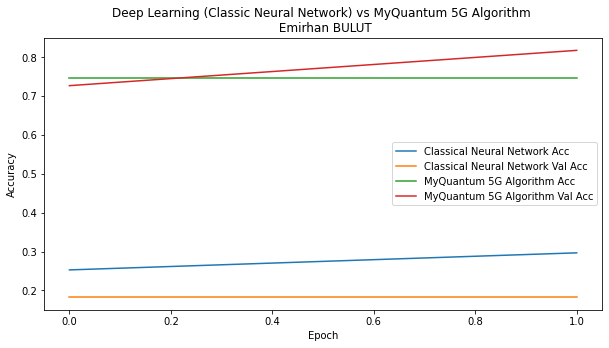

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(classic_fit.history['accuracy'], label='Classical Neural Network Acc')
plt.plot(classic_fit.history['val_accuracy'], label='Classical Neural Network Val Acc')
plt.plot(model_fit.history['accuracy'], label='MyQuantum 5G Algorithm Acc')
plt.plot(model_fit.history['val_accuracy'], label='MyQuantum 5G Algorithm Val Acc')
plt.title("Deep Learning (Classic Neural Network) vs MyQuantum 5G Algorithm \n Emirhan BULUT")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

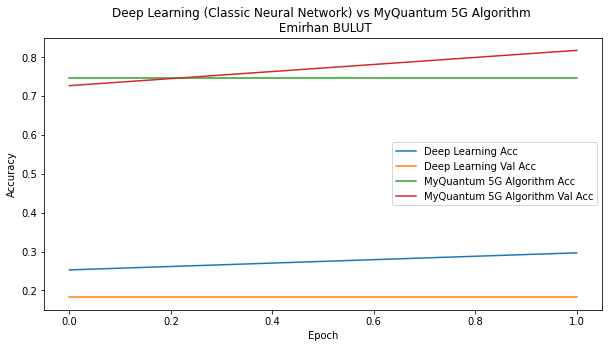

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(classic_fit.history['accuracy'], label='Deep Learning Acc')
plt.plot(classic_fit.history['val_accuracy'], label='Deep Learning Val Acc')
plt.plot(model_fit.history['accuracy'], label='MyQuantum 5G Algorithm Acc')
plt.plot(model_fit.history['val_accuracy'], label='MyQuantum 5G Algorithm Val Acc')
plt.title("Deep Learning (Classic Neural Network) vs MyQuantum 5G Algorithm \n Emirhan BULUT")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## ML Algorithm (RandomForest) vs MyQuantum 5G Algorithm

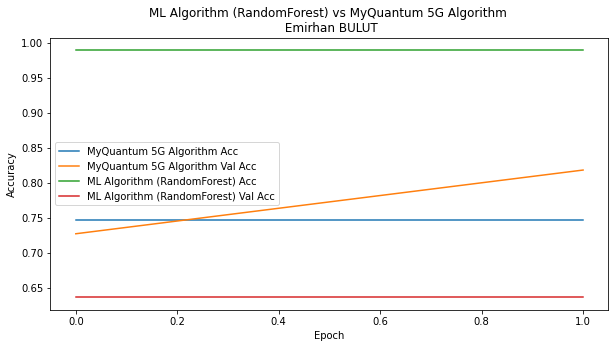

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(model_fit.history['accuracy'], label='MyQuantum 5G Algorithm Acc')
plt.plot(model_fit.history['val_accuracy'], label='MyQuantum 5G Algorithm Val Acc')
plt.plot([ml.score(X_train,y_train),ml.score(X_train,y_train)], label='ML Algorithm (RandomForest) Acc')
plt.plot([ml.score(X_test,y_test),ml.score(X_test,y_test)], label='ML Algorithm (RandomForest) Val Acc')
plt.title("ML Algorithm (RandomForest) vs MyQuantum 5G Algorithm \n Emirhan BULUT")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Classical AI Model Bytes vs Quantum 5G AI Model Bytes

In [ ]:
#Classic AI model save
classic_ai_model.save("classicai.h5")
#Quantum 5 AI model save
model.save("quantum5g.h5")

In [ ]:
import os
classic = "classicai.h5"
quantum = "quantum5g.h5"
file_stats_classic = os.stat(classic)
file_stats_quantum = os.stat(quantum)
print(f'Classic AI Model Size in Bytes is {file_stats_classic.st_size}')
print(f'Quantum 5G Model Size in Bytes is {file_stats_quantum.st_size}')

Classic AI Model Size in Bytes is 24120
Quantum 5G Model Size in Bytes is 20384


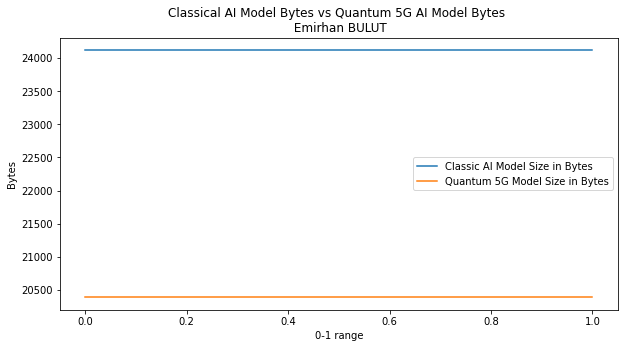

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([file_stats_classic.st_size,file_stats_classic.st_size], label='Classic AI Model Size in Bytes')
plt.plot([file_stats_quantum.st_size,file_stats_quantum.st_size], label='Quantum 5G Model Size in Bytes')
plt.title("Classical AI Model Bytes vs Quantum 5G AI Model Bytes \n Emirhan BULUT")
plt.xlabel('0-1 range')
plt.ylabel('Bytes')
plt.legend()